In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("weatherHistory.csv")
data=data.drop(columns='Unnamed: 4',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  int64  
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
 10  Apparent Temperature (C)  96453 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


First 5 rows of data

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Apparent Temperature (C)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,7.388889
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,7.227778
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,9.377778
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,5.944444
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,6.977778


.

Data Cleaning and feature engineering

.

In [4]:
avg=data['Pressure (millibars)'].mean()*96453/(96453-1288)

In [5]:
for i in range(len(data['Pressure (millibars)'])):
    if(data['Pressure (millibars)'][i]==0):
        data['Pressure (millibars)'][i]=avg

<ipython-input-5-c10a34fd18a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pressure (millibars)'][i]=avg


<AxesSubplot:>

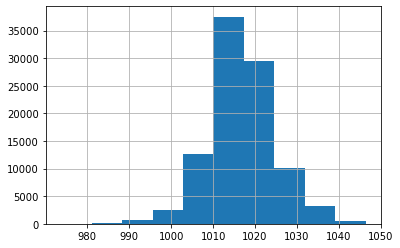

In [6]:
data['Pressure (millibars)'].hist()

In [7]:
data['Precip Type'].fillna('no rain',inplace =True)

In [8]:
data=data.drop(columns=['Formatted Date','Daily Summary'])

In [9]:
data_enc = pd.get_dummies(data, columns=['Summary','Precip Type'], drop_first=True)

In [10]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Temperature (C)                              96453 non-null  float64
 1   Humidity                                     96453 non-null  float64
 2   Wind Speed (km/h)                            96453 non-null  float64
 3   Wind Bearing (degrees)                       96453 non-null  int64  
 4   Visibility (km)                              96453 non-null  float64
 5   Pressure (millibars)                         96453 non-null  float64
 6   Apparent Temperature (C)                     96453 non-null  float64
 7   Summary_Breezy and Dry                       96453 non-null  uint8  
 8   Summary_Breezy and Foggy                     96453 non-null  uint8  
 9   Summary_Breezy and Mostly Cloudy             96453 non-null  uint8  
 10

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
lr=LinearRegression()
ss=StandardScaler()

Applying simple LR

In [13]:
Y = data_enc['Apparent Temperature (C)']
X = data_enc.drop(columns='Apparent Temperature (C)')

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=72018)
x_tr=ss.fit_transform(X_train)
lr.fit(x_tr,Y_train)
x_te=ss.transform(X_test)
y_pred=lr.predict(x_te)
y=list(Y_train)
yp=list(y_pred)
y1=list()
m=sum(y)/(len(y))
for i in range(len(y)):
    if((y[i]-yp[i])*(y[i]-yp[i])>50):
        break
    y1.append((y[i]-yp[i])*(y[i]-yp[i]))
    y[i]=(y[i]-m)*(y[i]-m)
s=sum(y1)
s2=sum(y)
print(1-s/s2)

1.0


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

In [16]:
pf = PolynomialFeatures(degree=2)
lr=LinearRegression()
ss=StandardScaler()
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
estimator = Pipeline([
        ("scaler", ss),
        ("polynomial_features", pf),
        ("regression", lr)])
predictions = cross_val_predict(estimator, X, Y, cv = kf)
r2_score(Y, predictions)

-5451030195030.817

LR with plolynomial features

In [17]:
y=list(Y_test)
yp=list(y_pred)
y1=list()
m=sum(y)/(len(y))
for i in range(len(y)):
    if((y[i]-yp[i])*(y[i]-yp[i])>50):
        break
    y1.append((y[i]-yp[i])*(y[i]-yp[i]))
    y[i]=(y[i]-m)*(y[i]-m)
s=sum(y1)
s2=sum(y)
print(1-s/s2)

0.9902460143846097


LR with Lasso Regression

In [19]:
pf = PolynomialFeatures(degree=2)
ss=StandardScaler()
las = Lasso(alpha=0.01, max_iter=100000)
estimator = Pipeline([
        ("scaler", ss),
        ("polynomial_features", pf),
        ("lasso_regression", las)])
predictions = cross_val_predict(estimator, X, Y, cv = kf)
score = r2_score(Y, predictions)
print(score)

0.9968264548414013
